### Importing Libraries

In [4]:
import os, datetime

import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

### Understanding the dataset

Dataset: https://www.kaggle.com/kumarajarshi/life-expectancy-who

Columns:
    - Country 
    - Year
    - Status: Developed or Developing status
    - Life expectancy: Life Expectancy in age 
    - Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population) 
    - infant deaths: Number of Infant Deaths per 1000 population
    - Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
    - percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
    - Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
    - Measles: Measles number of reported cases per 1000 population
    - BMI: Average Body Mass Index of entire population
    - under-five deaths: Number of under-five deaths per 1000 population
    - Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
    - Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
    - Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
    - HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)
    - GDP: Gross Domestic Product per capita (in USD)
    - Population: Population of the country
    - thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (%)
    - thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
    - Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
    - Schooling: Number of years of Schooling(years)
   

In [5]:
data = pd.read_csv('datasets/life_expectancy.csv')

data.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1235,Iraq,2014,Developing,67.9,199.0,32,0.01,43.524080,62.0,1317,...,67.0,5.54,64.0,0.1,673.747370,3568.0,5.3,5.1,0.658,10.1
22,Albania,2009,Developing,76.1,91.0,1,5.79,348.055952,98.0,0,...,98.0,5.79,98.0,0.1,4114.136545,2927519.0,1.5,1.6,0.721,12.2
1178,Iceland,2007,Developed,81.3,59.0,0,7.53,12042.973660,NaN,0,...,97.0,8.75,97.0,0.1,68348.318170,311566.0,0.9,0.9,0.887,18.2
1823,Nepal,2005,Developing,65.4,28.0,33,0.20,4.259753,41.0,5023,...,78.0,5.72,75.0,0.2,317.891980,2564287.0,17.6,18.2,0.469,9.4
2599,The former Yugoslav republic of Macedonia,2001,Developing,73.1,126.0,0,3.27,0.000000,NaN,27,...,91.0,8.18,91.0,0.1,NaN,NaN,2.8,2.8,0.000,11.8


In [6]:
data.shape

(2938, 22)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [8]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

### Processing the null values

There are many null values. Since the life expectancy depends on the status of country and particular country's detail, I thought, it made sense to fill the nan values with mean value with respect to country. Taking simple mean or interpolating didn't make much sense.

#### filling nan with country's mean

In [9]:
countries = data['Country'].unique()

na_cols = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B',
           ' BMI ', 'Polio', 'Total expenditure','Diphtheria ', 'GDP',
           ' thinness  1-19 years', ' thinness 5-9 years', 'Population',
           'Income composition of resources']

for col in na_cols:
    for country in countries:
        data.loc[data['Country']== country, col] = data.loc[data['Country'] == country, col]\
                                                        .fillna(data[data['Country'] == country][col].mean())

In [10]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                             17
percentage expenditure               0
Hepatitis B                        144
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                                0
Total expenditure                   32
Diphtheria                           0
 HIV/AIDS                            0
GDP                                405
Population                         648
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [11]:
data = data.dropna()

data.shape

(2128, 22)

In [12]:
data['Status'].value_counts()

Developing    1824
Developed      304
Name: Status, dtype: int64

In [13]:
data['Country'].value_counts()

Niger                    16
Sao Tome and Principe    16
Afghanistan              16
Panama                   16
Lithuania                16
                         ..
Honduras                 16
Chad                     16
Trinidad and Tobago      16
Germany                  16
Albania                  16
Name: Country, Length: 133, dtype: int64

### Data Visualization

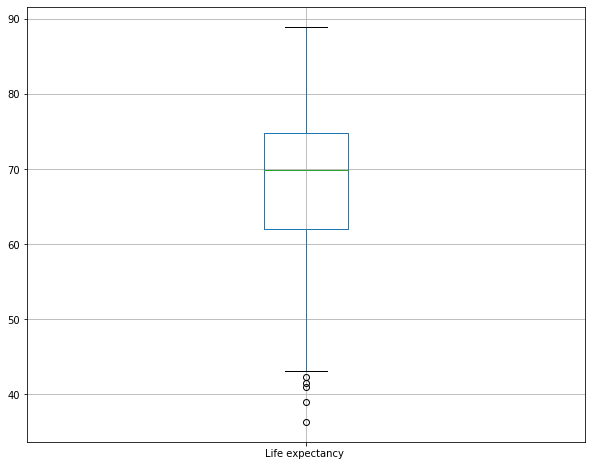

In [14]:
plt.figure(figsize=(10, 8))

data.boxplot('Life expectancy ')

plt.show()

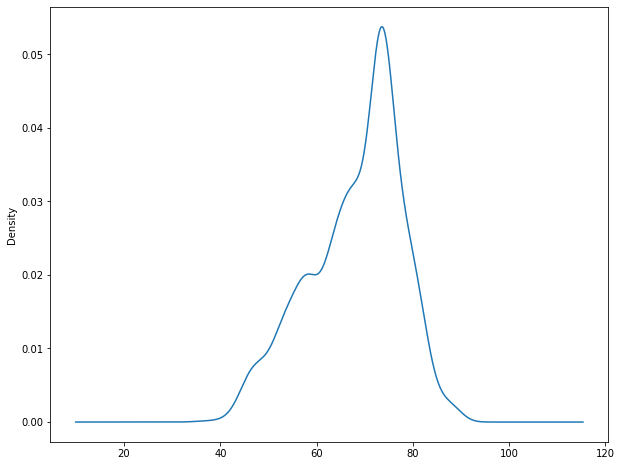

In [15]:
plt.figure(figsize=(10, 8))

data['Life expectancy '].plot.kde()

plt.show()

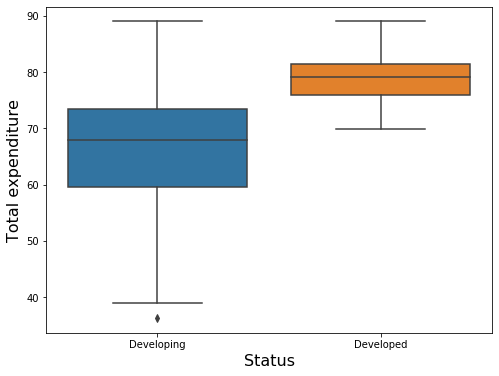

In [16]:
plt.figure(figsize=(8, 6))

sns.boxplot('Status', 'Life expectancy ', data = data)

plt.xlabel('Status', fontsize = 16)
plt.ylabel('Total expenditure', fontsize = 16)

plt.show()

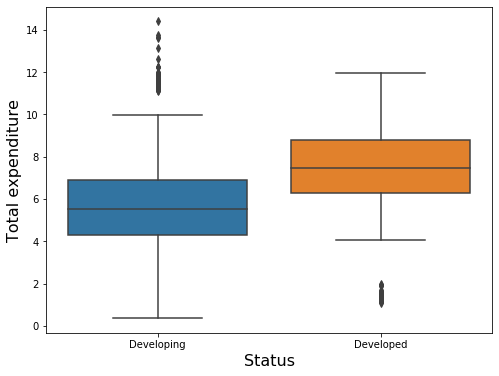

In [17]:
plt.figure(figsize=(8, 6))

sns.boxplot('Status', 'Total expenditure', data = data)

plt.xlabel('Status', fontsize = 16)
plt.ylabel('Total expenditure', fontsize = 16)

plt.show()

In [18]:
data_corr = data[['Life expectancy ', 
                  'Adult Mortality', 
                  'Schooling', 
                  'Total expenditure', 
                  'Diphtheria ', 
                  'GDP',
                  'Population']].corr()

data_corr

,Life expectancy,Adult Mortality,Schooling,Total expenditure,Diphtheria,GDP,Population
Life expectancy,1.000000,-0.662604,0.746619,0.203689,0.449975,0.445425,-0.011420
Adult Mortality,-0.662604,1.000000,-0.408661,-0.097938,-0.212157,-0.259500,-0.021050
Schooling,0.746619,-0.408661,1.000000,0.261679,0.432891,0.471767,-0.022453
Total expenditure,0.203689,-0.097938,0.261679,1.000000,0.183238,0.212498,-0.079752
Diphtheria,0.449975,-0.212157,0.432891,0.183238,1.000000,0.190957,-0.024167
GDP,0.445425,-0.259500,0.471767,0.212498,0.190957,1.000000,-0.016800
Population,-0.011420,-0.021050,-0.022453,-0.079752,-0.024167,-0.016800,1.000000


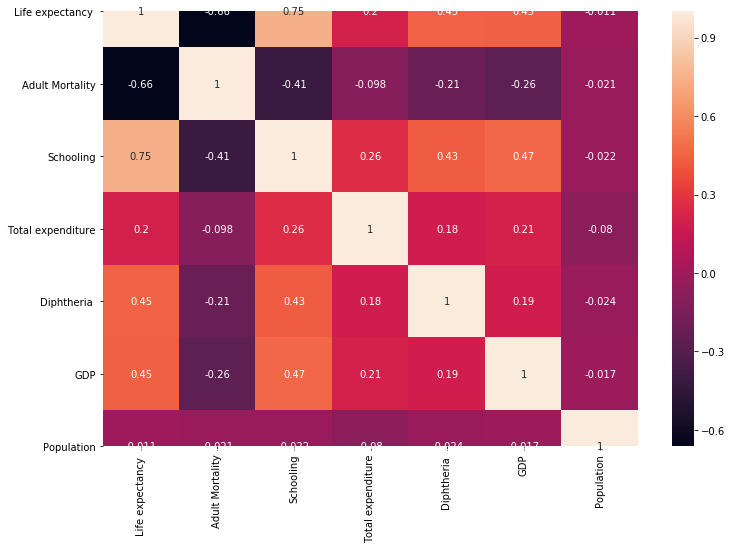

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(data_corr, annot=True)

plt.show()

We see that 'Adult mortality' and 'Schooling' is highly corelated with 'Life expectancy'

### Splitting the data

In [20]:
features = data.drop('Life expectancy ', axis=1)

target = data[['Life expectancy ']]

In [21]:
features.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [22]:
target.sample(5)

,Life expectancy
1266,82.5
200,68.6
2912,57.4
2442,74.7
1610,75.4


The country name doesn't matter since the rest of the values are related to certain country. 

In [23]:
features = features.drop('Country', axis=1)

features.columns

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [24]:
categorical_features = features['Status'].copy()

categorical_features.head()

0    Developing
1    Developing
2    Developing
3    Developing
4    Developing
Name: Status, dtype: object

In [25]:
categorical_features = pd.get_dummies(categorical_features)

categorical_features.head()

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [26]:
numeric_features = features.drop(['Status'], axis=1)

numeric_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [27]:
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2128.0,2.007500e+03,4.610856e+00,2000.00000,2003.750000,2.007500e+03,2.011250e+03,2.015000e+03
Adult Mortality,2128.0,1.743003e+02,1.297593e+02,1.00000,76.000000,1.520000e+02,2.412500e+02,7.230000e+02
infant deaths,2128.0,3.590273e+01,1.362247e+02,0.00000,1.000000,4.000000e+00,2.400000e+01,1.800000e+03
Alcohol,2128.0,4.436893e+00,3.962858e+00,0.01000,0.827500,3.735000e+00,7.162500e+00,1.787000e+01
percentage expenditure,2128.0,6.400720e+02,1.710799e+03,0.00000,19.883256,8.367799e+01,4.313651e+02,1.896135e+04
Hepatitis B,2128.0,7.727206e+01,2.526004e+01,2.00000,68.000000,8.700000e+01,9.500000e+01,9.900000e+01
Measles,2128.0,2.657467e+03,1.191224e+04,0.00000,0.000000,2.000000e+01,4.592500e+02,2.121830e+05
BMI,2128.0,3.669196e+01,1.984373e+01,1.40000,18.400000,3.885000e+01,5.520000e+01,7.760000e+01
under-five deaths,2128.0,4.981720e+01,1.851527e+02,0.00000,1.000000,4.000000e+00,3.425000e+01,2.500000e+03
Polio,2128.0,8.057201e+01,2.417005e+01,3.00000,75.000000,9.100000e+01,9.600000e+01,9.900000e+01


In [28]:
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features), 
                                columns=numeric_features.columns,
                                index=numeric_features.index)

numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2128.0,-3.130328e-19,1.000235,-1.626978,-0.813489,0.000000,0.813489,1.626978
Adult Mortality,2128.0,5.425902e-18,1.000235,-1.335866,-0.757737,-0.171899,0.516075,4.229591
infant deaths,2128.0,-2.626737e-16,1.000235,-0.263617,-0.256275,-0.234247,-0.087396,12.952948
Alcohol,2128.0,6.365000e-17,1.000235,-1.117358,-0.911020,-0.177159,0.687950,3.390549
percentage expenditure,2128.0,-1.915239e-16,1.000235,-0.374224,-0.362599,-0.325301,-0.122022,10.711711
Hepatitis B,2128.0,7.943207e-18,1.000235,-2.980588,-0.367151,0.385202,0.701983,0.860373
Measles,2128.0,3.124067e-16,1.000235,-0.223140,-0.223140,-0.221460,-0.184578,17.593236
BMI,2128.0,6.662382e-17,1.000235,-1.778912,-0.922017,0.108777,0.932909,2.061994
under-five deaths,2128.0,-1.316107e-16,1.000235,-0.269123,-0.263721,-0.247514,-0.084097,13.236418
Polio,2128.0,-2.178969e-16,1.000235,-3.210181,-0.230588,0.431544,0.638460,0.762610


In [29]:
processed_features = pd.concat([numeric_features, categorical_features], axis=1,
                               sort=False)

processed_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,1.626978,0.683732,0.191620,-1.117358,-0.332550,-0.485943,-0.126242,-0.886733,0.179261,-3.086031,...,-0.649601,-0.355934,-0.424250,0.322064,2.566866,2.523280,-0.631802,-0.497055,0,1
1,1.410048,0.745399,0.206305,-1.117358,-0.331238,-0.604736,-0.181828,-0.911936,0.195467,-0.934103,...,-0.773729,-0.355934,-0.421749,-0.207042,2.630549,2.564910,-0.646555,-0.528280,0,1
2,1.193118,0.722274,0.220990,-1.117358,-0.331416,-0.525541,-0.187034,-0.937139,0.211674,-0.768570,...,-0.690977,-0.355934,-0.420074,0.290313,2.673004,2.606539,-0.676060,-0.559506,0,1
3,0.976187,0.753107,0.243018,-1.117358,-0.328513,-0.406748,0.010876,-0.962342,0.233283,-0.561654,...,-0.566848,-0.355934,-0.416713,-0.153680,2.715459,2.668984,-0.710482,-0.590731,0,1
4,0.759257,0.776233,0.257703,-1.117358,-0.370075,-0.367151,0.029853,-0.982504,0.254892,-0.520270,...,-0.525472,-0.355934,-0.470041,-0.165057,2.779142,2.710614,-0.754739,-0.684408,0,1


In [30]:
processed_features.shape

(2128, 21)

### Splitting into test and train

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(processed_features, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state=1)

In [32]:
(x_train.shape, x_test.shape), (y_train.shape, y_test.shape)

(((1702, 21), (426, 21)), ((1702, 1), (426, 1)))

### 1st model

Model with one layer and sigmoid activation

Using .add() method

In [33]:
def build_single_layer_model():
    
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(32, 
                                    input_shape = (x_train.shape[1],), 
                                    activation = 'sigmoid'))

    model.add(tf.keras.layers.Dense(1))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    
    model.compile(loss = 'mse', 
                  metrics = ['mae', 'mse'], 
                  optimizer = optimizer)

    return model

In [34]:
model = build_single_layer_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


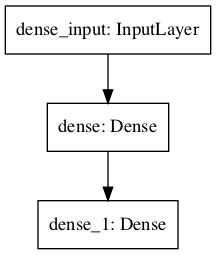

In [35]:
tf.keras.utils.plot_model(model)

In [36]:
x_train.shape

(1702, 21)

### Training the model

In [37]:
num_epochs = 100

training_history = model.fit(x_train, 
                             y_train,
                             epochs = num_epochs, 
                             validation_split = 0.2, 
                             verbose = True)

Train on 1361 samples, validate on 341 samples
Epoch 1/100
1361/1361 [==============================] - 1s 382us/sample - loss: 4137.7436 - mae: 63.6187 - mse: 4137.7441 - val_loss: 3512.7036 - val_mae: 58.6961 - val_mse: 3512.7039
Epoch 2/100
1361/1361 [==============================] - 0s 78us/sample - loss: 2841.5439 - mae: 52.4839 - mse: 2841.5437 - val_loss: 2147.7587 - val_mae: 45.5772 - val_mse: 2147.7588
Epoch 3/100
1361/1361 [==============================] - 0s 79us/sample - loss: 1568.2946 - mae: 38.4655 - mse: 1568.2948 - val_loss: 1046.7855 - val_mae: 31.2497 - val_mse: 1046.7855
Epoch 4/100
1361/1361 [==============================] - 0s 87us/sample - loss: 713.0293 - mae: 25.1397 - mse: 713.0293 - val_loss: 444.4580 - val_mae: 19.5941 - val_mse: 444.4579
Epoch 5/100
1361/1361 [==============================] - 0s 126us/sample - loss: 294.5544 - mae: 15.3695 - mse: 294.5545 - val_loss: 186.1776 - val_mae: 11.8754 - val_mse: 186.1776
Epoch 6/100
1361/1361 [================

Epoch 48/100
1361/1361 [==============================] - 0s 70us/sample - loss: 6.2908 - mae: 1.7862 - mse: 6.2908 - val_loss: 7.8808 - val_mae: 1.9701 - val_mse: 7.8808
Epoch 49/100
1361/1361 [==============================] - 0s 61us/sample - loss: 6.2243 - mae: 1.7888 - mse: 6.2243 - val_loss: 7.7899 - val_mae: 1.9790 - val_mse: 7.7899
Epoch 50/100
1361/1361 [==============================] - 0s 60us/sample - loss: 6.1308 - mae: 1.7616 - mse: 6.1308 - val_loss: 7.6229 - val_mae: 1.9326 - val_mse: 7.6229
Epoch 51/100
1361/1361 [==============================] - 0s 87us/sample - loss: 6.0753 - mae: 1.7591 - mse: 6.0753 - val_loss: 7.4840 - val_mae: 1.8982 - val_mse: 7.4840
Epoch 52/100
1361/1361 [==============================] - 0s 117us/sample - loss: 6.0553 - mae: 1.7574 - mse: 6.0553 - val_loss: 7.5157 - val_mae: 1.9127 - val_mse: 7.5157
Epoch 53/100
1361/1361 [==============================] - 0s 117us/sample - loss: 5.9694 - mae: 1.7381 - mse: 5.9694 - val_loss: 7.4073 - val_ma

Epoch 96/100
1361/1361 [==============================] - 0s 56us/sample - loss: 4.5434 - mae: 1.4957 - mse: 4.5434 - val_loss: 5.8393 - val_mae: 1.6575 - val_mse: 5.8393
Epoch 97/100
1361/1361 [==============================] - 0s 57us/sample - loss: 4.4915 - mae: 1.4899 - mse: 4.4915 - val_loss: 6.0185 - val_mae: 1.6904 - val_mse: 6.0185
Epoch 98/100
1361/1361 [==============================] - 0s 56us/sample - loss: 4.5202 - mae: 1.5058 - mse: 4.5202 - val_loss: 5.9802 - val_mae: 1.6781 - val_mse: 5.9802
Epoch 99/100
1361/1361 [==============================] - 0s 56us/sample - loss: 4.4820 - mae: 1.4841 - mse: 4.4820 - val_loss: 6.0311 - val_mae: 1.6752 - val_mse: 6.0311
Epoch 100/100
1361/1361 [==============================] - 0s 62us/sample - loss: 4.5550 - mae: 1.5153 - mse: 4.5550 - val_loss: 5.9581 - val_mae: 1.6600 - val_mse: 5.9581


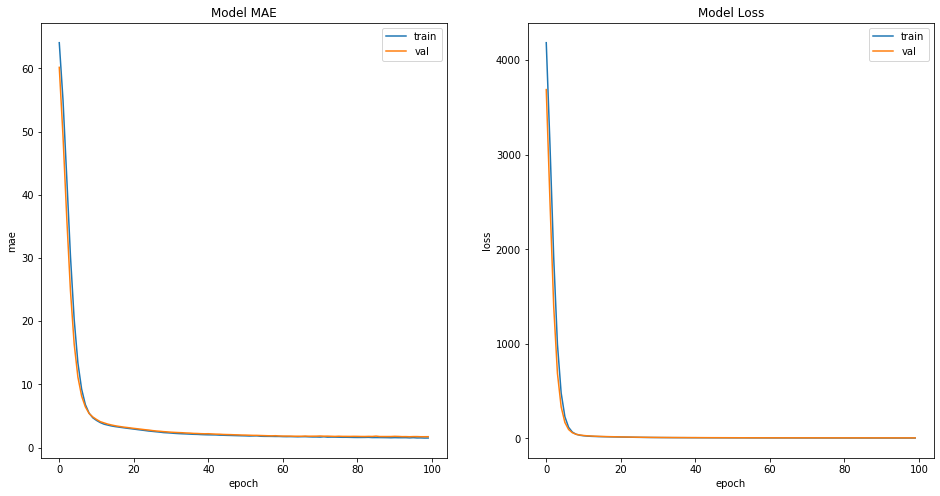

In [74]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)

plt.plot(training_history.history['mae'])
plt.plot(training_history.history['val_mae'])

plt.title('Model MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)

plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

#### Evaluating the model

In [75]:
model.evaluate(x_test, y_test)

426/426 [==============================] - 0s 38us/sample - loss: 6.4341 - mae: 1.8238 - mse: 6.4341


[6.434131447698029, 1.8238002, 6.434132]

In [76]:
y_pred = model.predict(x_test)

r2_score(y_test, y_pred)

0.9287217335843578

In [77]:
pred_results = pd.DataFrame({'y_test': y_test.values.flatten(),
                             'y_pred': y_pred.flatten()}, index = range(len(y_pred)))

pred_results.sample(10)

,y_test,y_pred
222,74.3,77.098251
340,64.5,63.492050
216,78.0,72.154327
383,51.5,50.644291
250,67.3,69.428192
201,76.0,69.503464
118,71.6,73.962250
275,79.7,79.990669
63,65.5,64.547913
164,71.1,73.633553


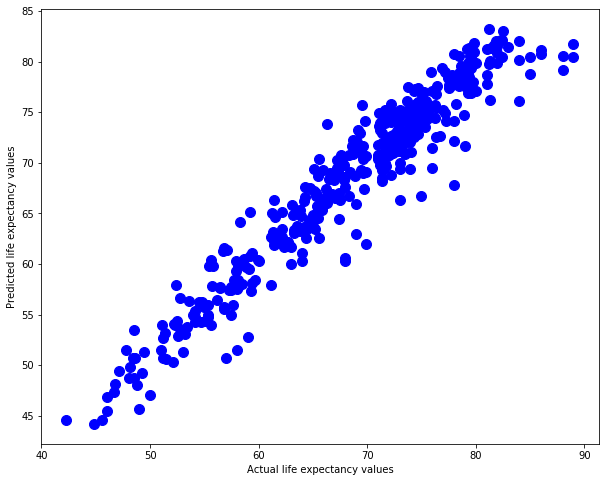

In [79]:
plt.figure(figsize=(10, 8))

plt.scatter(y_test, y_pred, s=100, c='blue')

plt.xlabel('Actual life expectancy values')
plt.ylabel('Predicted life expectancy values')
plt.show()

### 2nd model

Model with multiple layers and relu activation

In [91]:
def build_multiple_layer_model():
    
    model = keras.Sequential([layers.Dense(32, input_shape = (x_train.shape[1],), activation = 'relu'),
                              layers.Dense(16, activation = 'relu'),
                              layers.Dense(4, activation = 'relu'),
                              layers.Dense(1)])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
        
    model.compile(loss = 'mse', metrics = ['mae', 'mse'], optimizer = optimizer)
    
    return model

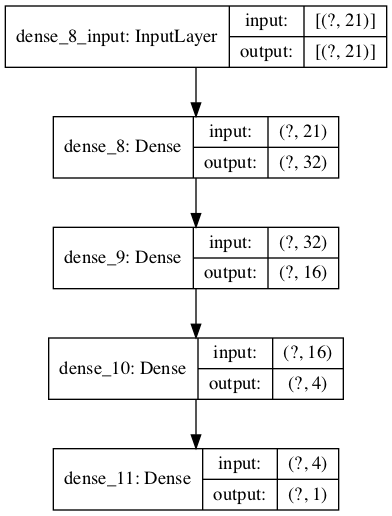

In [92]:
model = build_multiple_layer_model()

tf.keras.utils.plot_model(model, show_shapes=True)

#### For using tensorboard

In [ ]:
!rm -rf seq_logs

!ls -l

In [93]:
logdir = os.path.join("seq_logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
 
tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq = 1)

In [94]:
training_history = model.fit(x_train, 
                             y_train, 
                             validation_split = 0.2, 
                             epochs = 500,
                             batch_size = 100,
                             callbacks = [tensorboard_callback])

Train on 1156 samples, validate on 290 samples
Epoch 1/500
1156/1156 [==============================] - 0s 428us/sample - loss: 4740.9898 - mae: 68.1845 - mse: 4740.9902 - val_loss: 4755.5922 - val_mae: 68.2377 - val_mse: 4755.5923
Epoch 2/500
1156/1156 [==============================] - 0s 53us/sample - loss: 4700.9808 - mae: 67.8917 - mse: 4700.9810 - val_loss: 4721.7154 - val_mae: 67.9836 - val_mse: 4721.7153
Epoch 3/500
1156/1156 [==============================] - 0s 55us/sample - loss: 4667.8736 - mae: 67.6428 - mse: 4667.8735 - val_loss: 4682.8921 - val_mae: 67.6951 - val_mse: 4682.8921
Epoch 4/500
1156/1156 [==============================] - 0s 50us/sample - loss: 4625.9199 - mae: 67.3331 - mse: 4625.9194 - val_loss: 4629.0212 - val_mae: 67.3007 - val_mse: 4629.0215
Epoch 5/500
1156/1156 [==============================] - 0s 40us/sample - loss: 4567.8696 - mae: 66.9035 - mse: 4567.8696 - val_loss: 4557.1667 - val_mae: 66.7733 - val_mse: 4557.1670
Epoch 6/500
1156/1156 [=========

Epoch 93/500
1156/1156 [==============================] - 0s 46us/sample - loss: 30.4957 - mae: 4.2057 - mse: 30.4957 - val_loss: 31.8903 - val_mae: 4.3459 - val_mse: 31.8903
Epoch 94/500
1156/1156 [==============================] - 0s 49us/sample - loss: 29.8658 - mae: 4.1663 - mse: 29.8658 - val_loss: 31.1747 - val_mae: 4.3130 - val_mse: 31.1747
Epoch 95/500
1156/1156 [==============================] - 0s 44us/sample - loss: 29.5056 - mae: 4.1398 - mse: 29.5056 - val_loss: 31.0698 - val_mae: 4.2907 - val_mse: 31.0698
Epoch 96/500
1156/1156 [==============================] - 0s 38us/sample - loss: 29.0830 - mae: 4.1073 - mse: 29.0830 - val_loss: 30.7101 - val_mae: 4.2724 - val_mse: 30.7101
Epoch 97/500
1156/1156 [==============================] - 0s 45us/sample - loss: 28.7176 - mae: 4.0761 - mse: 28.7176 - val_loss: 30.2764 - val_mae: 4.2389 - val_mse: 30.2764
Epoch 98/500
1156/1156 [==============================] - 0s 53us/sample - loss: 28.2569 - mae: 4.0454 - mse: 28.2569 - val_l

Epoch 186/500
1156/1156 [==============================] - 0s 42us/sample - loss: 11.2026 - mae: 2.5142 - mse: 11.2026 - val_loss: 14.6438 - val_mae: 2.8393 - val_mse: 14.6438
Epoch 187/500
1156/1156 [==============================] - 0s 42us/sample - loss: 11.2007 - mae: 2.5221 - mse: 11.2007 - val_loss: 14.4847 - val_mae: 2.8140 - val_mse: 14.4847
Epoch 188/500
1156/1156 [==============================] - 0s 40us/sample - loss: 11.0615 - mae: 2.4966 - mse: 11.0615 - val_loss: 14.5009 - val_mae: 2.8363 - val_mse: 14.5009
Epoch 189/500
1156/1156 [==============================] - 0s 58us/sample - loss: 10.9965 - mae: 2.4939 - mse: 10.9965 - val_loss: 14.2023 - val_mae: 2.8069 - val_mse: 14.2023
Epoch 190/500
1156/1156 [==============================] - 0s 82us/sample - loss: 10.9839 - mae: 2.4919 - mse: 10.9839 - val_loss: 14.2150 - val_mae: 2.8007 - val_mse: 14.2150
Epoch 191/500
1156/1156 [==============================] - 0s 53us/sample - loss: 10.8516 - mae: 2.4733 - mse: 10.8516 -

Epoch 233/500
1156/1156 [==============================] - 0s 53us/sample - loss: 8.5973 - mae: 2.2011 - mse: 8.5973 - val_loss: 11.9464 - val_mae: 2.5355 - val_mse: 11.9464
Epoch 234/500
1156/1156 [==============================] - 0s 54us/sample - loss: 8.5682 - mae: 2.1862 - mse: 8.5682 - val_loss: 11.8834 - val_mae: 2.5251 - val_mse: 11.8834
Epoch 235/500
1156/1156 [==============================] - 0s 55us/sample - loss: 8.5178 - mae: 2.1859 - mse: 8.5178 - val_loss: 11.8262 - val_mae: 2.5247 - val_mse: 11.8262
Epoch 236/500
1156/1156 [==============================] - 0s 51us/sample - loss: 8.4704 - mae: 2.1770 - mse: 8.4704 - val_loss: 11.7407 - val_mae: 2.5023 - val_mse: 11.7407
Epoch 237/500
1156/1156 [==============================] - 0s 42us/sample - loss: 8.4812 - mae: 2.1752 - mse: 8.4812 - val_loss: 11.9472 - val_mae: 2.5409 - val_mse: 11.9472
Epoch 238/500
1156/1156 [==============================] - 0s 43us/sample - loss: 8.4839 - mae: 2.1768 - mse: 8.4839 - val_loss: 1

1156/1156 [==============================] - 0s 45us/sample - loss: 6.4448 - mae: 1.9032 - mse: 6.4448 - val_loss: 9.5818 - val_mae: 2.2604 - val_mse: 9.5818
Epoch 328/500
1156/1156 [==============================] - 0s 44us/sample - loss: 6.4267 - mae: 1.8860 - mse: 6.4267 - val_loss: 9.6844 - val_mae: 2.2659 - val_mse: 9.6844
Epoch 329/500
1156/1156 [==============================] - 0s 52us/sample - loss: 6.3356 - mae: 1.8688 - mse: 6.3356 - val_loss: 9.5550 - val_mae: 2.2366 - val_mse: 9.5550
Epoch 330/500
1156/1156 [==============================] - 0s 39us/sample - loss: 6.3826 - mae: 1.8767 - mse: 6.3826 - val_loss: 9.8073 - val_mae: 2.2866 - val_mse: 9.8073
Epoch 331/500
1156/1156 [==============================] - 0s 38us/sample - loss: 6.4897 - mae: 1.9040 - mse: 6.4897 - val_loss: 9.9523 - val_mae: 2.2975 - val_mse: 9.9523
Epoch 332/500
1156/1156 [==============================] - 0s 48us/sample - loss: 6.4046 - mae: 1.9005 - mse: 6.4046 - val_loss: 9.4917 - val_mae: 2.2477 

Epoch 375/500
1156/1156 [==============================] - 0s 54us/sample - loss: 5.7954 - mae: 1.7821 - mse: 5.7954 - val_loss: 9.1822 - val_mae: 2.2329 - val_mse: 9.1822
Epoch 376/500
1156/1156 [==============================] - 0s 50us/sample - loss: 5.8378 - mae: 1.7997 - mse: 5.8378 - val_loss: 9.0271 - val_mae: 2.2030 - val_mse: 9.0271
Epoch 377/500
1156/1156 [==============================] - 0s 42us/sample - loss: 5.7197 - mae: 1.7824 - mse: 5.7197 - val_loss: 8.9825 - val_mae: 2.2078 - val_mse: 8.9825
Epoch 378/500
1156/1156 [==============================] - 0s 42us/sample - loss: 5.7337 - mae: 1.7714 - mse: 5.7337 - val_loss: 9.2814 - val_mae: 2.2491 - val_mse: 9.2814
Epoch 379/500
1156/1156 [==============================] - 0s 44us/sample - loss: 5.8116 - mae: 1.8020 - mse: 5.8116 - val_loss: 8.9841 - val_mae: 2.2051 - val_mse: 8.9841
Epoch 380/500
1156/1156 [==============================] - 0s 56us/sample - loss: 5.7006 - mae: 1.7751 - mse: 5.7006 - val_loss: 9.0408 - va

Epoch 470/500
1156/1156 [==============================] - 0s 42us/sample - loss: 4.8740 - mae: 1.6346 - mse: 4.8740 - val_loss: 8.6142 - val_mae: 2.1875 - val_mse: 8.6142
Epoch 471/500
1156/1156 [==============================] - 0s 47us/sample - loss: 4.8487 - mae: 1.6307 - mse: 4.8487 - val_loss: 8.6414 - val_mae: 2.1901 - val_mse: 8.6414
Epoch 472/500
1156/1156 [==============================] - 0s 45us/sample - loss: 4.8317 - mae: 1.6265 - mse: 4.8317 - val_loss: 8.6891 - val_mae: 2.1922 - val_mse: 8.6891
Epoch 473/500
1156/1156 [==============================] - 0s 44us/sample - loss: 4.8349 - mae: 1.6243 - mse: 4.8349 - val_loss: 8.7470 - val_mae: 2.2033 - val_mse: 8.7470
Epoch 474/500
1156/1156 [==============================] - 0s 57us/sample - loss: 4.8977 - mae: 1.6375 - mse: 4.8977 - val_loss: 8.9021 - val_mae: 2.2297 - val_mse: 8.9021
Epoch 475/500
1156/1156 [==============================] - 0s 47us/sample - loss: 4.8246 - mae: 1.6226 - mse: 4.8246 - val_loss: 8.5862 - va

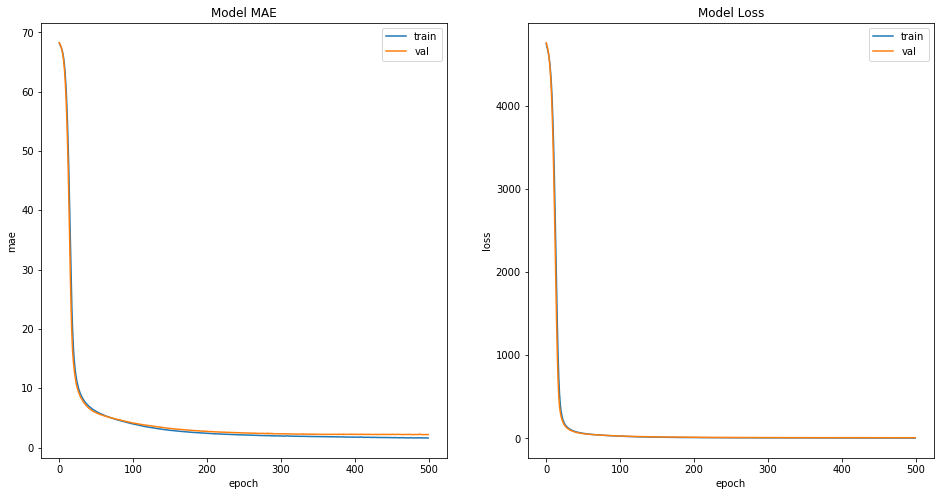

In [105]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)

plt.plot(training_history.history['mae'])
plt.plot(training_history.history['val_mae'])

plt.title('Model MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)

plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

In [96]:
%load_ext tensorboard

In [97]:
%tensorboard --logdir seq_logs --port 6500 

Go to port localhost:6500 and show the graph

- Explore the scalars tab, show only train and validation data (using checkbox, I think in the recording you do this at the very end, just do it together with the other stuff at the beginning)
- You can show just one of the scalars, don't need to show all
- Explore Graphs, this part was proper
- Explore distributions, can only show one of the scalars, don't need to show all
- Explore histograms, can only show one of the kernels/biases don't need to show all



#### Evaluating the model

In [98]:
model.evaluate(x_test, y_test)

426/426 [==============================] - 0s 113us/sample - loss: 7.4555 - mae: 2.0131 - mse: 7.4555


[7.455483835068107, 2.0131028, 7.455484]

In [101]:
y_pred = model.predict(x_test)

r2_score(y_test, y_pred)

0.9174070352093832

### Using SGD as loss function

In [106]:
def build_model_with_sgd():
    
    model = keras.Sequential([layers.Dense(32, input_shape = (x_train.shape[1],), activation = 'relu'),
                              layers.Dense(16, activation = 'relu'),
                              layers.Dense(4, activation = 'relu'),
                              layers.Dense(1)])
    
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)
        
    model.compile(loss = 'mse', metrics = ['mae', 'mse'], optimizer = optimizer)
    
    return model

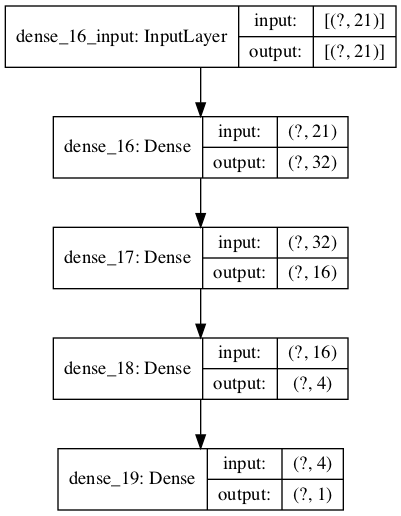

In [107]:
model_sgd = build_model_with_sgd()

tf.keras.utils.plot_model(model_sgd, show_shapes=True)

In [108]:
training_history = model_sgd.fit(x_train, 
                                 y_train, 
                                 validation_split = 0.2, 
                                 epochs = 100,
                                 batch_size = 100)

Train on 1156 samples, validate on 290 samples
Epoch 1/100
1156/1156 [==============================] - 0s 387us/sample - loss: 3621.5405 - mae: 56.5395 - mse: 3621.5403 - val_loss: 1856.7524 - val_mae: 40.9408 - val_mse: 1856.7523
Epoch 2/100
1156/1156 [==============================] - 0s 45us/sample - loss: 2518.3352 - mae: 46.3399 - mse: 2518.3350 - val_loss: 4007.6095 - val_mae: 62.5318 - val_mse: 4007.6094
Epoch 3/100
1156/1156 [==============================] - 0s 44us/sample - loss: 1503.3179 - mae: 32.0415 - mse: 1503.3177 - val_loss: 356.0676 - val_mae: 17.6472 - val_mse: 356.0676
Epoch 4/100
1156/1156 [==============================] - 0s 45us/sample - loss: 155.4910 - mae: 10.8648 - mse: 155.4910 - val_loss: 138.0323 - val_mae: 10.3854 - val_mse: 138.0323
Epoch 5/100
1156/1156 [==============================] - 0s 62us/sample - loss: 49.6014 - mae: 5.7170 - mse: 49.6014 - val_loss: 20.7807 - val_mae: 3.6159 - val_mse: 20.7807
Epoch 6/100
1156/1156 [=========================

Epoch 48/100
1156/1156 [==============================] - 0s 42us/sample - loss: 9.2061 - mae: 2.4489 - mse: 9.2061 - val_loss: 8.3467 - val_mae: 2.1177 - val_mse: 8.3467
Epoch 49/100
1156/1156 [==============================] - 0s 40us/sample - loss: 7.2181 - mae: 2.1347 - mse: 7.2181 - val_loss: 7.8712 - val_mae: 2.0599 - val_mse: 7.8712
Epoch 50/100
1156/1156 [==============================] - 0s 57us/sample - loss: 10.4778 - mae: 2.6476 - mse: 10.4778 - val_loss: 14.2810 - val_mae: 3.0449 - val_mse: 14.2810
Epoch 51/100
1156/1156 [==============================] - 0s 47us/sample - loss: 9.2211 - mae: 2.4574 - mse: 9.2211 - val_loss: 10.0853 - val_mae: 2.4488 - val_mse: 10.0853
Epoch 52/100
1156/1156 [==============================] - 0s 35us/sample - loss: 6.2743 - mae: 1.9205 - mse: 6.2743 - val_loss: 8.6465 - val_mae: 2.2697 - val_mse: 8.6465
Epoch 53/100
1156/1156 [==============================] - 0s 40us/sample - loss: 7.1500 - mae: 2.0969 - mse: 7.1500 - val_loss: 10.8495 - v

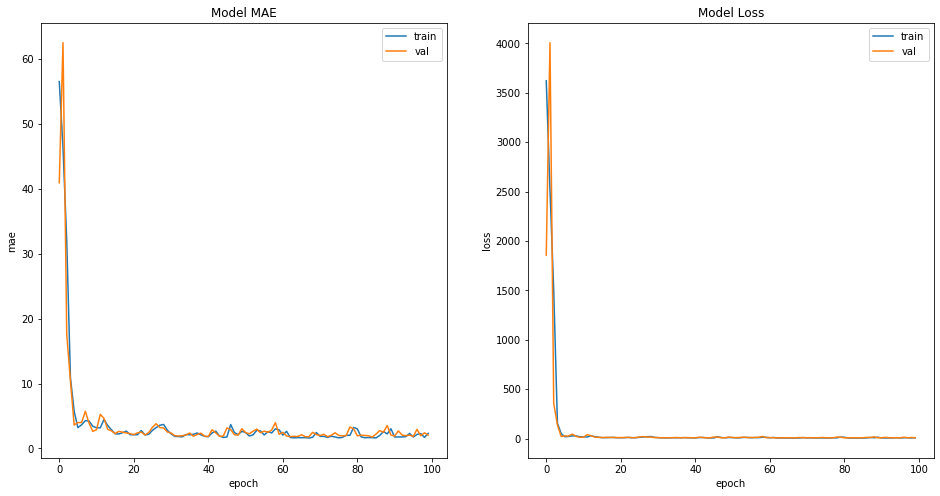

In [109]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)

plt.plot(training_history.history['mae'])
plt.plot(training_history.history['val_mae'])

plt.title('Model MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)

plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

#### Evaluating the model

In [110]:
model_sgd.evaluate(x_test, y_test)

426/426 [==============================] - 0s 46us/sample - loss: 7.3268 - mae: 1.9795 - mse: 7.3268


[7.32684357625218, 1.9794788, 7.326844]

In [111]:
y_pred = model_sgd.predict(x_test)

r2_score(y_test, y_pred)

0.918832132860016

### Using RMSprop as loss function

In [112]:
def build_model_with_rmsprop():
    
    model = keras.Sequential([layers.Dense(16, input_shape = (x_train.shape[1],), activation = 'elu'),
                              layers.Dense(8, activation = 'elu'),
                              layers.Dense(4, activation = 'elu'),
                              layers.Dense(1)])
    
    optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001)
        
    model.compile(loss = 'mse', metrics = ['mae', 'mse'], optimizer = optimizer)
    
    return model

In [113]:
model_rmsprop = build_model_with_rmsprop()

In [114]:
training_history = model_rmsprop.fit(x_train, 
                                 y_train, 
                                 validation_split = 0.2, 
                                 epochs = 100, 
                                 batch_size=100)

Train on 1156 samples, validate on 290 samples
Epoch 1/100
1156/1156 [==============================] - 1s 570us/sample - loss: 4673.6642 - mae: 67.7379 - mse: 4673.6646 - val_loss: 4684.5485 - val_mae: 67.7608 - val_mse: 4684.5488
Epoch 2/100
1156/1156 [==============================] - 0s 47us/sample - loss: 4635.2523 - mae: 67.4501 - mse: 4635.2520 - val_loss: 4648.9397 - val_mae: 67.4969 - val_mse: 4648.9395
Epoch 3/100
1156/1156 [==============================] - 0s 46us/sample - loss: 4599.8537 - mae: 67.1887 - mse: 4599.8540 - val_loss: 4611.8480 - val_mae: 67.2211 - val_mse: 4611.8481
Epoch 4/100
1156/1156 [==============================] - 0s 52us/sample - loss: 4562.6401 - mae: 66.9120 - mse: 4562.6401 - val_loss: 4572.3988 - val_mae: 66.9292 - val_mse: 4572.3989
Epoch 5/100
1156/1156 [==============================] - 0s 45us/sample - loss: 4523.2394 - mae: 66.6198 - mse: 4523.2393 - val_loss: 4530.8155 - val_mae: 66.6207 - val_mse: 4530.8154
Epoch 6/100
1156/1156 [=========

Epoch 91/100
1156/1156 [==============================] - 0s 73us/sample - loss: 19.8176 - mae: 3.2158 - mse: 19.8176 - val_loss: 21.7545 - val_mae: 3.2304 - val_mse: 21.7545
Epoch 92/100
1156/1156 [==============================] - 0s 49us/sample - loss: 19.4251 - mae: 3.1829 - mse: 19.4251 - val_loss: 21.6330 - val_mae: 3.2508 - val_mse: 21.6330
Epoch 93/100
1156/1156 [==============================] - 0s 65us/sample - loss: 19.0988 - mae: 3.1588 - mse: 19.0988 - val_loss: 21.1894 - val_mae: 3.1841 - val_mse: 21.1894
Epoch 94/100
1156/1156 [==============================] - 0s 57us/sample - loss: 18.6678 - mae: 3.1224 - mse: 18.6678 - val_loss: 20.6484 - val_mae: 3.1442 - val_mse: 20.6484
Epoch 95/100
1156/1156 [==============================] - 0s 53us/sample - loss: 18.3620 - mae: 3.0972 - mse: 18.3620 - val_loss: 20.3351 - val_mae: 3.1205 - val_mse: 20.3351
Epoch 96/100
1156/1156 [==============================] - 0s 60us/sample - loss: 18.0425 - mae: 3.0732 - mse: 18.0424 - val_l

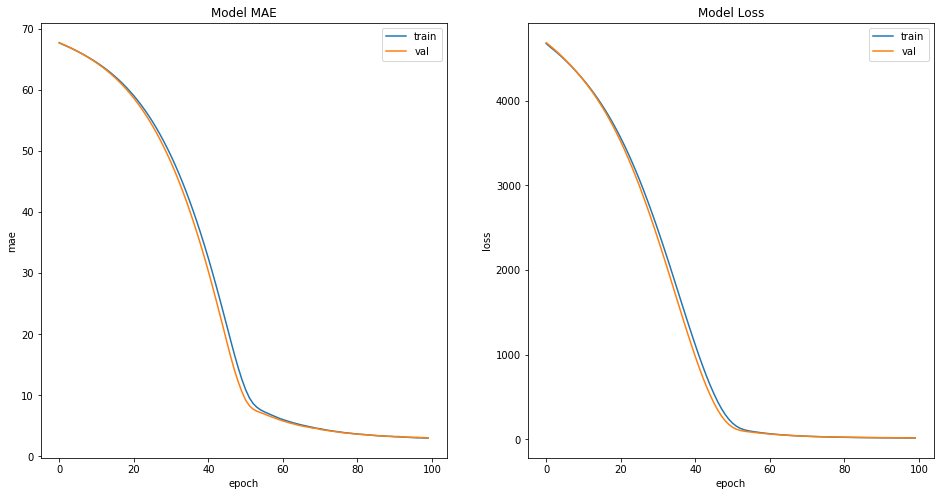

In [115]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)

plt.plot(training_history.history['mae'])
plt.plot(training_history.history['val_mae'])

plt.title('Model MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)

plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

#### Evaluating the model

In [116]:
model_rmsprop.evaluate(x_test, y_test)

426/426 [==============================] - 0s 41us/sample - loss: 17.2711 - mae: 3.0848 - mse: 17.2711


[17.271147419029557, 3.0848308, 17.271147]

In [118]:
y_pred = model_rmsprop.predict(x_test)

r2_score(y_test, y_pred)

0.8086676591539649